# Flight Delay Prediction: An exploration of machine learning concepts to determine the accuracy of a flight delay prediction model

### Introduction to Machine Learning Using Python Final Project
### Adityan Manhapra
### 11/02/2021


## 1. Introduction

The purpose of this project is to try and create a predictive classifier that will tell you if your flight will be delayed by more than 15 minutes. The goal is to be able to do this with readily available data that is available at least one day before the flight of interest. This is a practical application of machine learning, as we have all had instances where an accurate model of this problem would have proved incredibly useful. 

The dataset that I will be using is found on kaggle.com, named "2019 Airline Delays w/Weather and Airport Detail". The link to the dataset is as follows: https://www.kaggle.com/threnjen/2019-airline-delays-and-cancellations?select=train_test.csv

In the data explorer on the site, there are a few datasets. I chose the 1.37GB train_test dataset, which contains data from all of 2019. This dataset is quite large, with approximately 6.5 million rows and 25 different features. The dataset is limited to flights departing from airports in the United States. Below is an explanation of each column in the dataset csv:

DEP_DEL15 (binary, Target category) - The target category. 1 represents a flight delayed by more than 15 minutes, while 0 represents a flight that was delayed by 15 minutes or less. 

MONTH (categorical) - Int from 1 to 12, each representing a month of the year.

DAY_OF_WEEK (categorical) - Int from 1 to 7, each representing a day of the week.

DISTANCE_GROUP (categorical) - Int from 1 to 10, describing the distance to be flown by the departing aircraft. 

DEP_BLOCK (categorical) - String that represents the time of day of departure

SEGMENT_NUMBER (categorical) - The tail number representation.

CONCURRENT_FLIGHTS (numerical) - Concurretn flgihts leaving from the airport in same departure block. 

NUMBER_OF_SEATS (numerical) - Number of seats in aircraft

CARRIER_NAME (categorical) - Aircraft carrier.

AIRPORT_FLIGHTS_MONTH (numerical) - Average airport flights per month

AIRLINE_FLIGHTS_MONTH (numerical) - Average airline flights per month

AIRLINE_AIRPORT_FLIGHTS_MONTH (numerical) - average flights per month for airline and airport

AVG_MONTHLY_PASS_AIRPORT (numerical) - average monthly passengers for the departing airport

AVG_MONTHLY_PASS_AIRLINE (numerical) - average monthly passengers for the airline for month

FLT_ATTENDANTS_PER_PASS (numerical) - flight attendants per passenger

GROUND_SERV_PER_PASS (numerical) - ground service employees per passenger

PLANE_AGE (numerical) - age of departing aircraft

DEPARTING_AIRPORT (categorical) - departing airport

LATITUDE (numerical) - laititude of departing airport

LONGITUDE (numerical) - longitude of departing airport

PREVIOUS_AIRPORT (categorical) - previous airport that aircraft departed from

PRCP (numerical) - inches of precipitation for day

SNOW (numerical) - inches of snowfall for day

SNWD (numerical) - inches of snow on ground for day

TMAX (numerical) - max temperature for day

AWND (numerical) - max wind speed for day


## 2. Needed Libraries

The needed python modules for this project are shown below. I have imported all of pandas, numpy, and seaborn as there are many functions of each integral to this project. In addition, I have imported the needed data processing and meachine learning modules from sklearn including data scalers, various classifiers, and data analysis tools. 


In [1]:
#Importing all needed libraries and modules. I used the most updated version of each library and module 

import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.compose import make_column_selector as col_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix–

import matplotlib.pyplot as plt
%matplotlib inline

## 3. Initial Data Analysis

### 3.1 Importing Data Set

First order of business is to import the dataset and assign it to dataframe df_orig. Let's also split out the target column into a target data series, then remove the target column from the dataframe. Afterwards, let's take a quick look at the columns and see what type of objects are in each.

In [2]:
df_orig = pd.read_csv('flight_info.csv')
df_orig.head()


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,MORNING,1,109,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,7,MORNING,1,109,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,7,MORNING,1,109,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,9,MORNING,1,109,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,7,EARLY_MORNING,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


### 3.2 Target Value Distribution

Let's see if the dataset is balanced (similar amounts of delayed and non-delayed data).

In [3]:
df_orig['DEP_DEL15'].value_counts()

0    5264776
1    1273945
Name: DEP_DEL15, dtype: int64

In this case, there is a difference between the representation of delayed and non-delayed flights. However, the difference is not significant enough to warrant evening out the data set (in terms of order of magnitude, the dataset is fairly balanced between the 2 target classes). 

In addition, I did the whole excercise below with an evened-out dataset, and for all of the classifiers used, it returned accuracies that were 10+ % lower than if the original, unbalanced dataset was used. 

In addition, since we have so many data points (~6.5 million!), the computation time(even with PCA) is incredibly large. I am choosing to shuffle the dataset and only use 20% of the original dataset, which is still an enormous number of data points. This only dropped the accuracy by 1-2% at most for most classifiers, and the computation time was significantly shorter, so I believe this tradeoff is worth it.

In [4]:
df_orig = df_orig.sample(frac=1)

df = df_orig.sample(frac=0.2, random_state = 23)
del df_orig #saving space

In [5]:
#Splitting out the target and the feature columns into separate dataframes

target = df['DEP_DEL15'].copy(deep=True)
df=df.drop(['DEP_DEL15'], axis=1)

In [6]:
print(df.isna().sum())
df.info()
df.shape

MONTH                            0
DAY_OF_WEEK                      0
DISTANCE_GROUP                   0
DEP_BLOCK                        0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307744 entries, 5566694 to 3053732
Data columns (total 25 col

(1307744, 25)

### 3.3 Our features: What do we see with an initial look?

So from an initial look at our features dataset, there are do not seem to be any N/A values. Let's take a closer look at the categorical columns, since missing values might show up as something else. The "Month" and "DAY_OF_WEEK" columns, even though displayed as ints, will be treated as categorical columns(since there are only 12 possible months adn 7 possible days, this is not continuous numeric data)

In [7]:
print("Value counts of CARRIER_NAME Field: \n", df['CARRIER_NAME'].value_counts())
df['CARRIER_NAME'].describe()

Value counts of CARRIER_NAME Field: 
 Southwest Airlines Co.          261437
Delta Air Lines Inc.            189591
American Airlines Inc.          181689
United Air Lines Inc.           120839
SkyWest Airlines Inc.           117937
Midwest Airline, Inc.            60279
JetBlue Airways                  54151
Alaska Airlines Inc.             48383
American Eagle Airlines Inc.     46491
Comair Inc.                      44359
Endeavor Air Inc.                40878
Spirit Air Lines                 38389
Mesa Airlines Inc.               35375
Frontier Airlines Inc.           24290
Atlantic Southeast Airlines      19723
Hawaiian Airlines Inc.           15079
Allegiant Air                     8854
Name: CARRIER_NAME, dtype: int64


count                    1307744
unique                        17
top       Southwest Airlines Co.
freq                      261437
Name: CARRIER_NAME, dtype: object

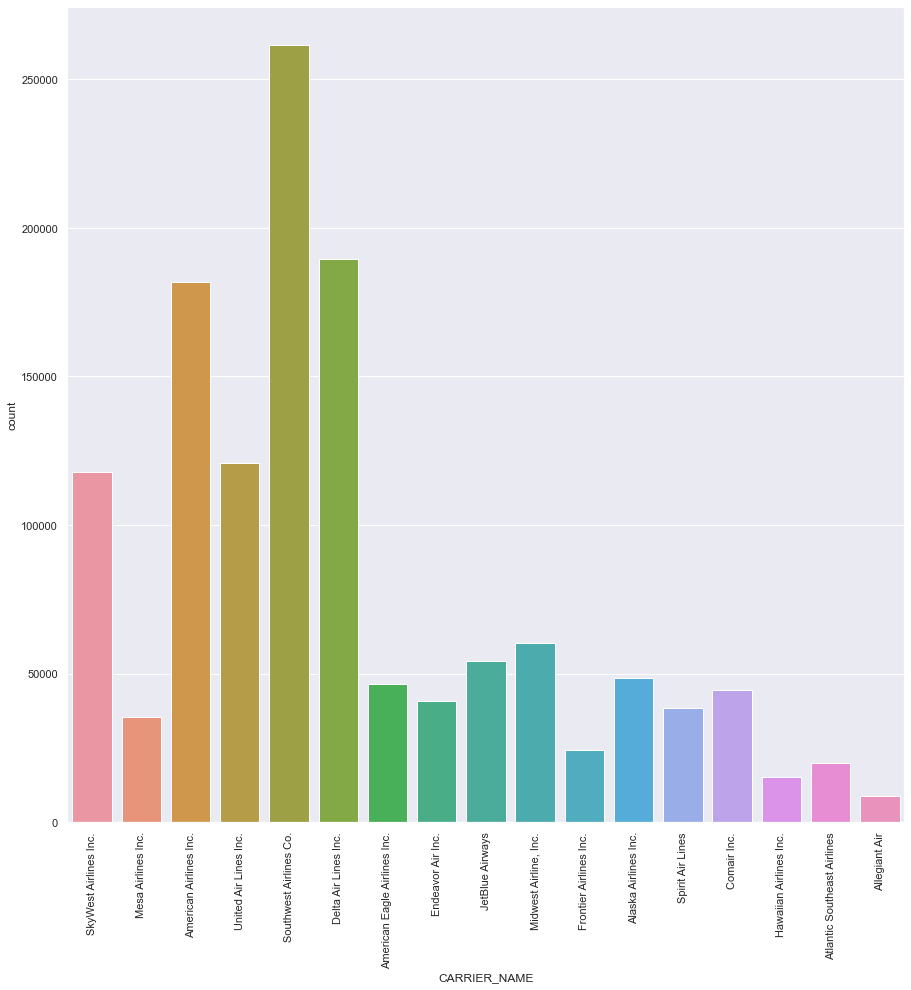

In [8]:
sns.set(rc={'figure.figsize':(15,15)})
chart = sns.countplot(
    data=df, x='CARRIER_NAME'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

None


Value counts of Departure Block Field: 
 MORNING          346332
EVENING          298648
AFTERNOON        297971
MIDDAY           239881
LATE_NIGHT        94792
EARLY_MORNING     30120
Name: DEP_BLOCK, dtype: int64


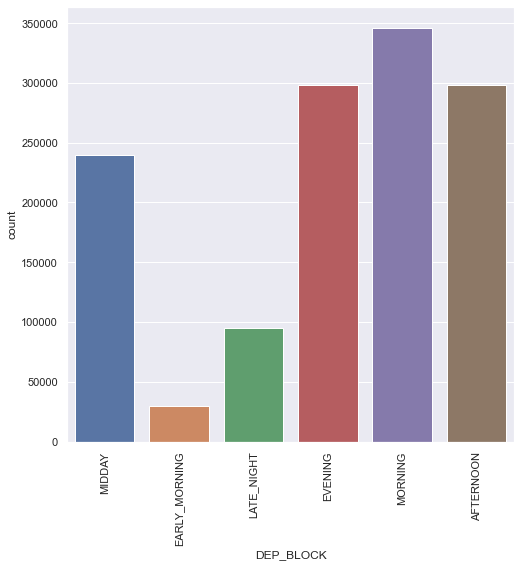

In [9]:
print("Value counts of Departure Block Field: \n", df['DEP_BLOCK'].value_counts())

sns.set(rc={'figure.figsize':(8,8)})
chart = sns.countplot(
    data=df, x='DEP_BLOCK'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

None

Value counts of Segment Number: 
 2     303403
1     290890
3     237765
4     214388
5     122351
6      90425
7      27699
8      16432
9       2138
10      1012
11       604
12       408
13       169
14        49
15        11
Name: SEGMENT_NUMBER, dtype: int64


<AxesSubplot:>

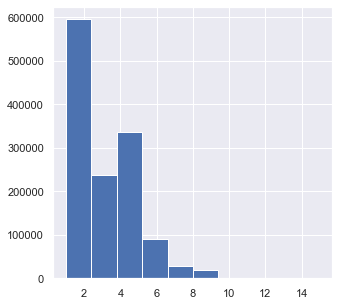

In [10]:
print("Value counts of Segment Number: \n", df['SEGMENT_NUMBER'].value_counts())
df['SEGMENT_NUMBER'].hist(figsize=(5,5))

Value counts of Distance Group Field: 
 2     311805
3     264830
4     207536
1     145098
5     141092
6      60362
7      58452
10     38002
8      31688
11     27345
9      21534
Name: DISTANCE_GROUP, dtype: int64


<AxesSubplot:>

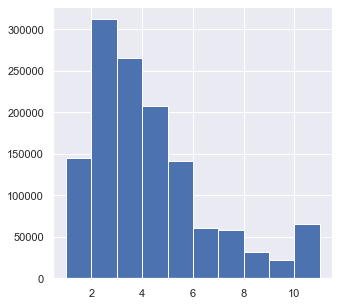

In [11]:
print("Value counts of Distance Group Field: \n", df['DISTANCE_GROUP'].value_counts())
df['DISTANCE_GROUP'].hist(figsize=(5,5))

In [12]:
print("Value counts of Month Field: \n", df['MONTH'].value_counts())

Value counts of Month Field: 
 8     231497
7     115662
5     112040
10    111689
6     111611
3     111181
12    110658
4     106861
11    106604
1      99895
2      90046
Name: MONTH, dtype: int64


In [13]:
print("Value counts of Day of Week Field: \n", df['DAY_OF_WEEK'].value_counts())

Value counts of Day of Week Field: 
 5    199265
4    196295
1    190572
2    189818
3    187779
7    182414
6    161601
Name: DAY_OF_WEEK, dtype: int64


In [14]:
print("Value counts of PREVIOUS_AIRPORT Field: \n", df['PREVIOUS_AIRPORT'].value_counts())
df['PREVIOUS_AIRPORT'].describe()

Value counts of PREVIOUS_AIRPORT Field: 
 NONE                              290890
Atlanta Municipal                  41927
Chicago O'Hare International       35939
Stapleton International            27983
Dallas Fort Worth Regional         27024
                                   ...  
Chicago/Rockford International        12
Adak NS                                5
Pago Pago International                4
Yakutat Airport                        1
Petersburg James A Johnson             1
Name: PREVIOUS_AIRPORT, Length: 355, dtype: int64


count     1307744
unique        355
top          NONE
freq       290890
Name: PREVIOUS_AIRPORT, dtype: object

In [15]:
print("Value counts of DEPARTING_AIRPORT Field: \n", df['DEPARTING_AIRPORT'].value_counts())
df['DEPARTING_AIRPORT'].describe()

Value counts of DEPARTING_AIRPORT Field: 
 Atlanta Municipal                 79842
Chicago O'Hare International      66525
Dallas Fort Worth Regional        59418
Stapleton International           49746
Douglas Municipal                 46615
                                  ...  
Portland International Jetport      988
Spokane International               953
Pensacola Regional                  921
Sanford NAS                         439
Puerto Rico International            17
Name: DEPARTING_AIRPORT, Length: 96, dtype: int64


count               1307744
unique                   96
top       Atlanta Municipal
freq                  79842
Name: DEPARTING_AIRPORT, dtype: object

### 3.4 Analysis of Categorical Columns

From the looks of it, the 'day of week", and "month" columns seem to have no missing values, which is great news. They also all seem to have a good represntation of each of their unique values. "Distance group", "segment number", 'Carrier_name',  do not have missing values, but the distribution of values is not as great as the other 4 mentioned categorical columns. 

We start running into problems with the "Previous Airport" field, which seems to have missing values for a very large part of the dataset. There is no real good way to replace these values, since assigning the mode of the rest of the dataset here would not make sense. I will choose to remove this column from the features, as it has too many irreplaceable missing values.

The "Departing Airport" column does not have the same issue. No values seem missing in this case. However, this column has another problem: only 96 unique airports. There are >5000 public airports in the US, making this a very small proportion of the total airports. This is alleviated by the fact that the represented airports seem to be the largest ones in the US, probably accounting for most of the air traffic we would see. This column, however, seems superfluous since we also have data on the latitude and longitude of each departure. In this case, I would prefer to remove the "Departing Airport" column, as that data is already represented in the "Latitude" and "Longitude" columns. Furthermore, if we want to use the model later for an airport that is not represented amongst the 84 in this data set, we can still use latitude and longitude as a way to have departure location play a part in the prediction. 

I am also going to drop the segment number and distance group, as I do not think these are very easily accesible information for a layman looking to use this model to predict their flight. 


In [16]:
df.drop(['PREVIOUS_AIRPORT', 'DEPARTING_AIRPORT', 'SEGMENT_NUMBER', 'DISTANCE_GROUP'], axis=1) 
df.describe().sum()
#dropped the 2 columns

MONTH                            1.307788e+06
DAY_OF_WEEK                      1.307770e+06
DISTANCE_GROUP                   1.307772e+06
SEGMENT_NUMBER                   1.307774e+06
CONCURRENT_FLIGHTS               1.308450e+06
NUMBER_OF_SEATS                  1.308710e+06
AIRPORT_FLIGHTS_MONTH            1.400445e+06
AIRLINE_FLIGHTS_MONTH            1.713033e+06
AIRLINE_AIRPORT_FLIGHTS_MONTH    1.345113e+06
AVG_MONTHLY_PASS_AIRPORT         1.262534e+07
AVG_MONTHLY_PASS_AIRLINE         5.167871e+07
FLT_ATTENDANTS_PER_PASS          1.307744e+06
GROUND_SERV_PER_PASS             1.307744e+06
PLANE_AGE                        1.307828e+06
LATITUDE                         1.307978e+06
LONGITUDE                        1.307167e+06
PRCP                             1.307752e+06
SNOW                             1.307762e+06
SNWD                             1.307770e+06
TMAX                             1.308160e+06
AWND                             1.307813e+06
dtype: float64

####  3.4.1 Latitude and Longitude Map

Let's take a look at where the flights in the dataset depart from using the latitude and longitude columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

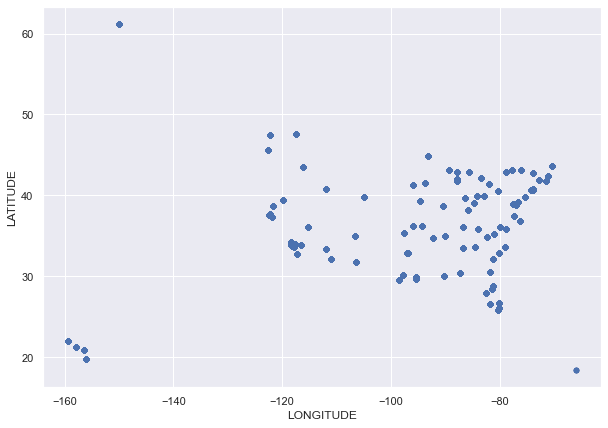

In [17]:
df.plot(kind = 'scatter', x='LONGITUDE', y='LATITUDE', alpha=0.4, figsize=(10,7))

We seem to have good coverage of not only the continental US, but Hawaii(bottom left), Alaska (top left), and Puerto Rico(bottom right) as well! Looks like a great dataset that has data from all across the US

### 3.5 Numerical Column Analysis

Now that we have a good handle on the categorical columns, let's turn our attention to the numerical columns. Let us first make a dataframe with only the numerical columns.

In [18]:
df_num = df.select_dtypes(include=['int64', 'float64']).drop(['MONTH', 'DAY_OF_WEEK'], axis=1)
df_num.describe()

,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06,1.307744e+06
mean,3.822050e+00,3.052698e+00,9.135256e+01,1.336999e+02,1.277780e+04,6.342219e+04,3.488426e+03,1.589398e+06,7.816454e+06,9.759668e-05,1.355222e-04,1.154912e+01,3.670937e+01,-9.424764e+01,1.058496e-01,3.105845e-02,9.036593e-02,7.183851e+01,8.279150e+00
std,2.384956e+00,1.761464e+00,6.801604e+01,4.645679e+01,8.927309e+03,3.460983e+04,4.297419e+03,1.126099e+06,5.047061e+06,8.650635e-05,4.645895e-05,6.932919e+00,5.506323e+00,1.792436e+01,3.206275e-01,3.142475e-01,7.212845e-01,1.851015e+01,3.572347e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,6.020000e+03,1.000000e+00,7.047600e+04,4.737940e+05,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,2.000000e+00,2.000000e+00,3.600000e+01,9.000000e+01,5.353000e+03,2.513800e+04,6.570000e+02,6.732210e+05,2.688839e+06,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,3.000000e+00,3.000000e+00,7.900000e+01,1.430000e+02,1.156200e+04,7.118800e+04,2.254000e+03,1.486066e+06,8.501631e+06,6.178236e-05,1.246511e-04,1.200000e+01,3.750500e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,7.610000e+00
75%,5.000000e+00,4.000000e+00,1.260000e+02,1.720000e+02,1.772500e+04,8.718300e+04,4.834000e+03,2.006675e+06,1.246018e+07,1.441659e-04,1.772872e-04,1.700000e+01,4.077900e+01,-8.093600e+01,3.000000e-02,0.000000e+00,0.000000e+00,8.700000e+01,1.029000e+01
max,1.100000e+01,1.500000e+01,3.050000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,4.365661e+06,1.338300e+07,3.484077e-04,2.289855e-04,3.200000e+01,6.116900e+01,-6.600200e+01,7.130000e+00,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


(20.0, -1.0)

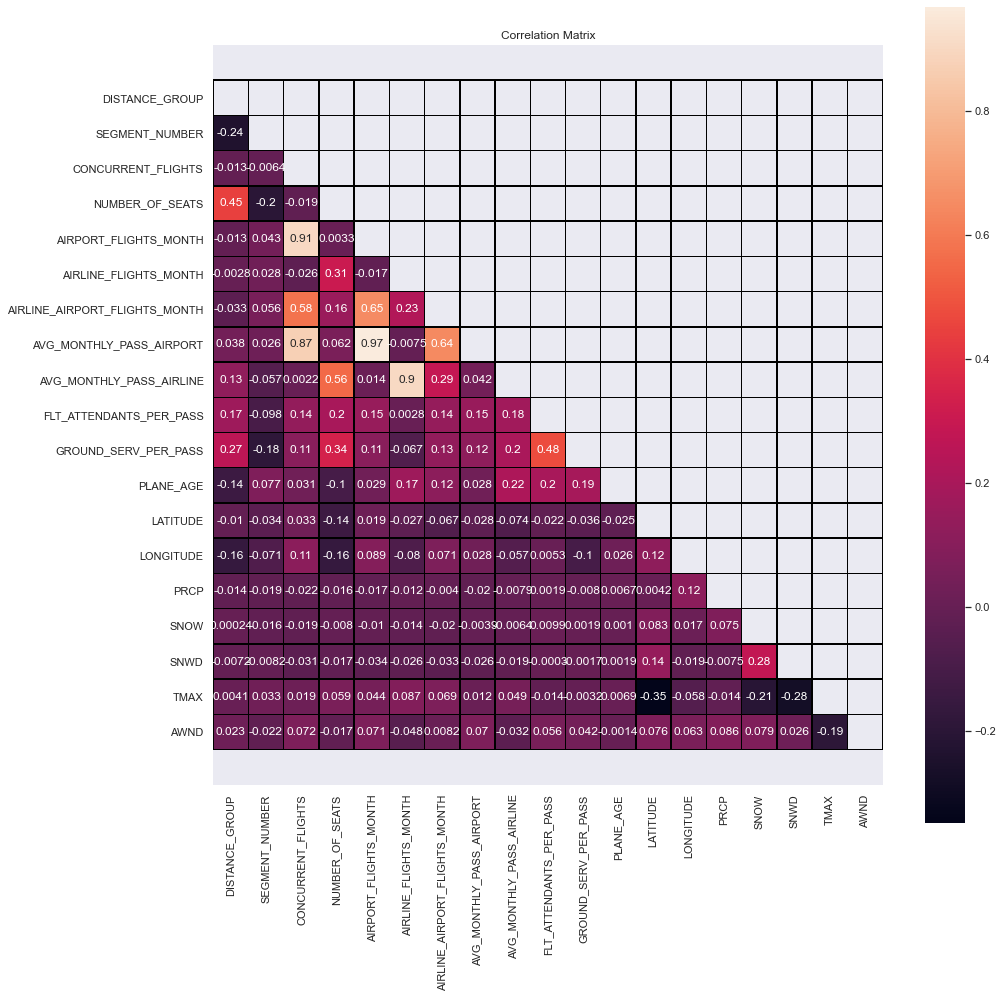

In [19]:
matrix = np.triu(df_num.corr())
plt.figure(figsize = (15,15))
plt.title("Correlation Matrix")
ax = sns.heatmap(df_num.corr(), annot = True, square=True, \
            linewidths=0.5, linecolor='black', mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)


### 3.6 Feature correlation

concurrent flights is 87% correlated with avg_monthly_pass_airport

airport_flights_months is 91% correlated with avg_monthly_pass_airport

airline_flights_month is 90% correlated with avg_monthly_pass_airline

I will drop concurrent_flights, airport_flights_month, and airline_flights_month, since they are all very well captured within the rest of the data set as shown above.

In [20]:
df_num.columns
df_num = df_num.drop(['AIRPORT_FLIGHTS_MONTH', 'CONCURRENT_FLIGHTS', 'AIRLINE_FLIGHTS_MONTH'], axis=1)
df = df.drop(['AIRPORT_FLIGHTS_MONTH', 'CONCURRENT_FLIGHTS', 'AIRLINE_FLIGHTS_MONTH'], axis=1)


In [21]:
df_num.shape

(1307744, 16)

#### 3.6.1 Normality

Now, let's see which numerical columns seem to be normal and which ones dont. I will use a standard scaler for the normal columns and either MinMax or robust scaler for the others

array([[<AxesSubplot:title={'center':'DISTANCE_GROUP'}>,
        <AxesSubplot:title={'center':'SEGMENT_NUMBER'}>,
        <AxesSubplot:title={'center':'NUMBER_OF_SEATS'}>,
        <AxesSubplot:title={'center':'AIRLINE_AIRPORT_FLIGHTS_MONTH'}>],
       [<AxesSubplot:title={'center':'AVG_MONTHLY_PASS_AIRPORT'}>,
        <AxesSubplot:title={'center':'AVG_MONTHLY_PASS_AIRLINE'}>,
        <AxesSubplot:title={'center':'FLT_ATTENDANTS_PER_PASS'}>,
        <AxesSubplot:title={'center':'GROUND_SERV_PER_PASS'}>],
       [<AxesSubplot:title={'center':'PLANE_AGE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'PRCP'}>],
       [<AxesSubplot:title={'center':'SNOW'}>,
        <AxesSubplot:title={'center':'SNWD'}>,
        <AxesSubplot:title={'center':'TMAX'}>,
        <AxesSubplot:title={'center':'AWND'}>]], dtype=object)

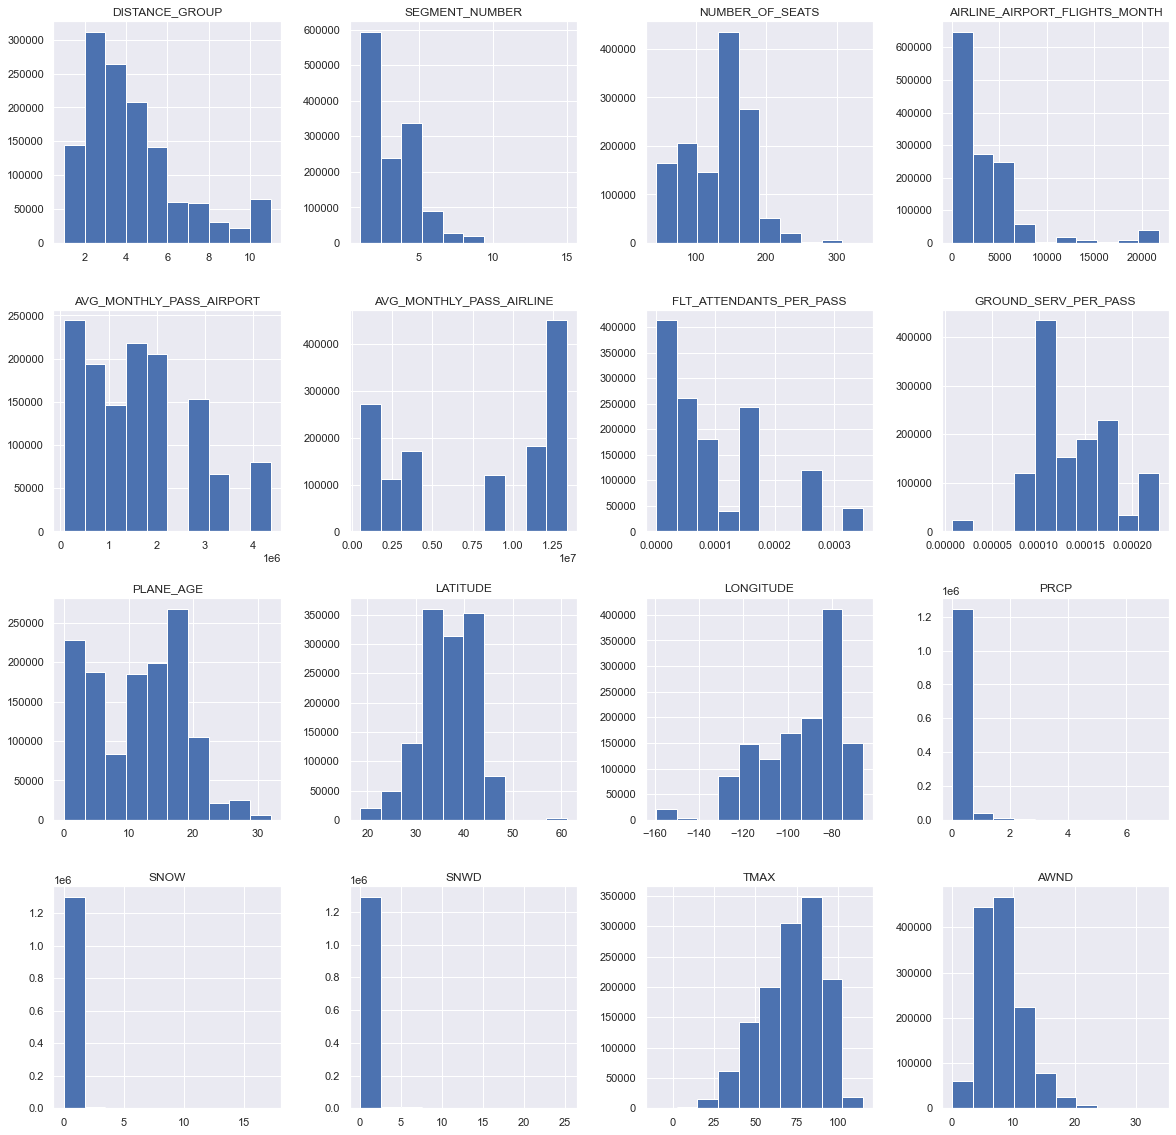

In [22]:
df_num.hist(figsize=(20,20))

Unfortunately, the only features that seem to exhibit normality seem to be the TMAX and the Latitude Columns. For everything else, we will have to use the non-standard scalers. I will now split the original feature dataframe into 3 dataframes: categorical, normal numerical data, and non-normal. This is to get the column names to be used to transform

In [23]:
df_num_norm = df_num[['LATITUDE', 'TMAX']].copy(deep=True)
df_num_non = df_num.drop(['LATITUDE', 'TMAX'], axis=1)
df_cat = df[['CARRIER_NAME', 'DEP_BLOCK', 'MONTH', 'DAY_OF_WEEK']]

## 4. Transforming, normalizing, and PCA

I will now apply the following transformations to the data:

Categorical features: One Hot Encoding

Normal Numeric Features: Standard Scaler

NonNormal Numeric Features: MinMax Scaler

I use a pipeline to do the above.

I did try PCA'ing to reduce the numerical features, but the accuracy to computing power tradeoff was not significant enough for me to use PCA. For reference, the computing time for a model was only ~15% reduced for a test random forest model resulting in a 5% decrease in accuracy for a 6-component PCA. 

In [24]:
col_selector_obj = col_selector()
categorical_features = col_selector_obj(df_cat)
normal_numeric_features = col_selector_obj(df_num_norm)
nonnormal_numeric_features = col_selector_obj(df_num_non)

full_pipeline = ColumnTransformer([('num_norm', StandardScaler(), normal_numeric_features),('nonnorm', MinMaxScaler(), nonnormal_numeric_features), ('cat', OneHotEncoder(), categorical_features)])
x_transformed = full_pipeline.fit_transform(df)
y_transformed = target.to_numpy()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y_transformed, test_size=0.2,
                                                    random_state=0)



## 5. GridSearch

I will use a gridsearch to find the best parameters and then use the optimal parameters to create, fit, and test each of the models that I want to use

### 5.1 Logistic Regression

The first model I will try to fit is logistic regression, which is the classic model for a classification problem. 

I did not try out sag solver as saga is the same as sag but with regularization support for l1 regularization. Also removed liblinear, as it is better for smaller datasets, but for larger datasets, its performance stutters. 

In [26]:
#Gridsearch for logistic regression
params = {'solver':['newton-cg', 'saga', 'lbfgs'], 'C':[1,3,10], 'penalty':['l2', 'none']}



#Have to change the max_iter to 150 to allow some models to converge. 
logi = LogisticRegression(max_iter = 150)
logi_search = GridSearchCV(logi, param_grid = params, cv = 3, verbose=True, n_jobs=-1)
final_logi_search = logi_search.fit(x_train, y_train)
print(final_logi_search.best_params_)

y_pred_logi = final_logi_search.best_estimator_.predict(x_test)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/adityanmanhapra/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


### 5.2 Random Forest

The second model I will try to fit is random forest, which is one of the newer, more popular modeling mechanisms.  

There aren't too many parameters to mess with, and I do not want to make the GridSearch unneedingly complex and resource-intensive (especially since Random Forest takes so much computing power). Some exploratory fits showed that the parameters did not change accuracy too much, so only trying to vary n_estimators, max_features, and max_samples

The Random Forest Classifier grid search had issues with some of the parameter combinations that it tested, as they returned "NaN" values for its internal test score. This is something to further explore in the future, as I suspect that it relates to the n_estimators value being too low. 

In [27]:
#Gridsearch for random forest classifier
params_rfc = {'n_estimators':[50,75], 'max_features':['auto','sqrt','log2'], 'max_samples':[0.5, 1.0]}



rfc = RandomForestClassifier()
rfc_search = GridSearchCV(rfc, param_grid = params_rfc, cv = 3, verbose=True, n_jobs=-1)
final_rfc_search = rfc_search.fit(x_train, y_train)
print(final_rfc_search.best_params_)

y_pred_rfc = final_rfc_search.best_estimator_.predict(x_test)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/adityanmanhapra/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/adityanmanhapra/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81477162 0.81554299        nan        nan 0.81483662 0.81547513
        nan        nan 0.81456421 0.81506125        nan        nan]
  warnings.warn(


{'max_features': 'auto', 'max_samples': 0.5, 'n_estimators': 75}


### 5.3 Naive Bayes

The third model to try is Naive bayes. No grid search is needed here, as there are no hyperparameters to tune.

### 5.4 Support vector machine

The fourth model I tried to fit was support vector machine, which is falling out of favor with the rising popularity of Random Forest. 

Unfortunately, the computational power to fit even one SVM Model was incredibly large, and took more than an hour to fit(I had to stop the kernel, so I am not even sure how long it would take theoretically). I tried dimensionality reduction using PCA to reduce the numerical columns down to 2 principal components to help with the computation time, but it did not provide any discernible computational relief. I also tried to use the ordinal encoder instead of the onehotencoder for the categorical columns, since ordinal encoder returns far less columns than one hot encoding does and thus should help with computational time. Even then, I could not get the SVM to converge. It seems as if the dataset is far too large to handle for the SVC without significant changes that would allow the result to converge faster (either that, or the computational power of my machine is too low to be able to implement an SVM for this dataset). 

Due to the above issues, I abandoned the SVM model for this problem. 

## 6. Comparing accuracies of optimal models

### 6.1 Accuracy of optimal logistic regression parameter model


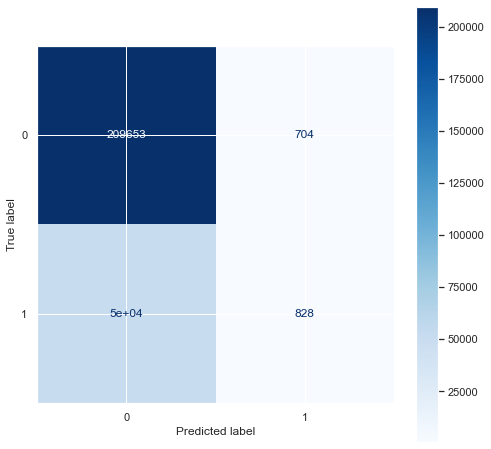

Accuracy: 80.47478675123972


In [28]:
plot_confusion_matrix(final_logi_search.best_estimator_, x_test, y_test, cmap="Blues")  
plt.show()  


print("Accuracy:", accuracy_score(y_test, y_pred_logi)*100)

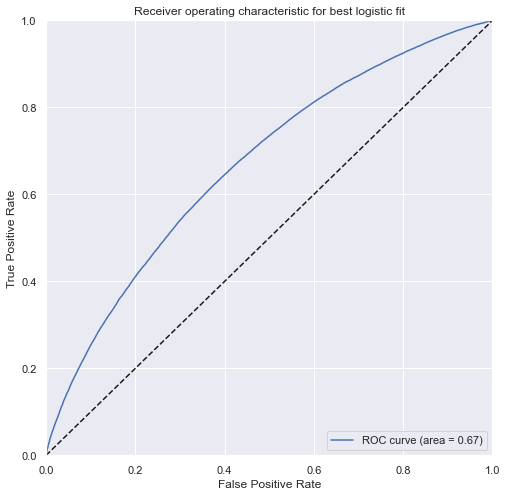

In [29]:
# plotting ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

b = final_logi_search.best_estimator_.predict_proba(x_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, b)
logit_roc_auc = roc_auc_score(y_test, b)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for best logistic fit')
plt.legend(loc="lower right")
plt.show()

In [30]:
#Logistic Regression fit time for optimal candidate
logi_opt = LogisticRegression(C= 1, penalty= 'l2', solver= 'lbfgs', max_iter = 150)
t=time.time()
logi_opt.fit(x_train, y_train)
print('Time to fit one logistic regression model: ', time.time()-t)

Time to fit one logistic regression model:  5.357822895050049


/Users/adityanmanhapra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 6.2 Accuracy of optimal Random Forest Classifier parameter model

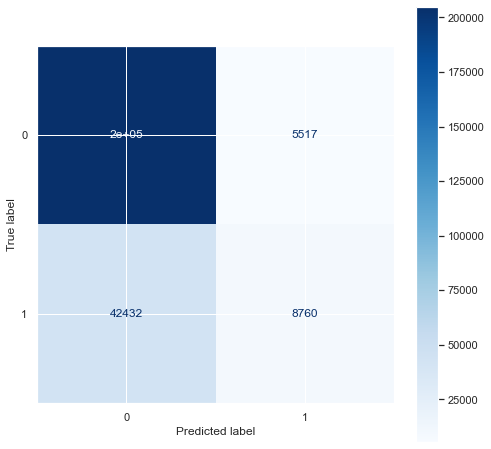

Accuracy: 81.66729752359979


In [31]:
plot_confusion_matrix(final_rfc_search.best_estimator_, x_test, y_test, cmap="Blues")  
plt.show()  


print("Accuracy:", accuracy_score(y_test, y_pred_rfc)*100)

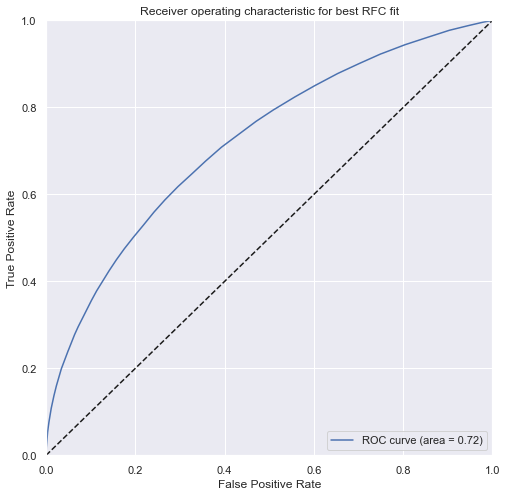

In [32]:
b = final_rfc_search.best_estimator_.predict_proba(x_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, b)
rfc_roc_auc = roc_auc_score(y_test, b)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %rfc_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for best RFC fit')
plt.legend(loc="lower right")
plt.show()

In [33]:
#RFC fit time for optimal candidate
rfc_opt = RandomForestClassifier(max_features = 'auto',max_samples= 0.5, n_estimators= 75 )
t=time.time()
rfc_opt.fit(x_train, y_train)
print('Time to fit one RFC Regression model: ', time.time()-t)

Time to fit one RFC Regression model:  80.35319304466248


### 6.3 Accuracy of Naive Bayes model

Time to fit NB classifier:  1.1500749588012695


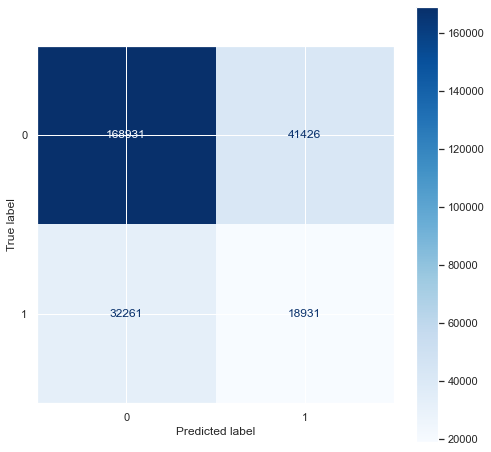

Accuracy: 71.82669404203419


In [34]:
nb = GaussianNB()

t=time.time()
nb.fit(x_train,y_train)
print('Time to fit NB classifier: ', time.time()-t)

y_pred_nb = nb.predict(x_test)

plot_confusion_matrix(nb, x_test, y_test, cmap="Blues")  
plt.show()  


print("Accuracy:", accuracy_score(y_test, y_pred_nb)*100)

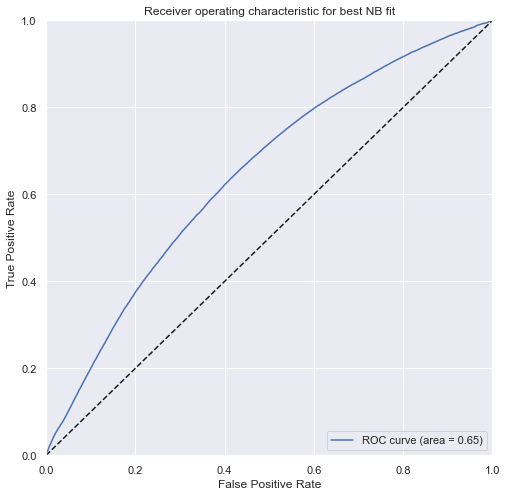

In [35]:
b = nb.predict_proba(x_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, b)
nb_roc_auc = roc_auc_score(y_test, b)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %nb_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for best NB fit')
plt.legend(loc="lower right")
plt.show()

## 7. Conclusion

----------------------------

In conclusion, I was able to use the provided data set to produce 3 models to be able to predict a flight delay of greater than 15 minutes. 

The first model was an optimized Logistic Regression classifier, which yielded an accuracy of 80.5% with the test data and produced an AUC for the ROC Curve of 0.67. The second model was an optimized Decision Forest classifier, which yielded an accuracy of 81.7% and an AUC for the ROC Curve of 0.72. The third model was a Naive Bayes classifier wich yielded an accuracy of 71.8% and an AUC for the ROC curve of 0.65. 





Between the 3 models, the Decision Forest showed the greatest accuracy and AUC for the ROC curve. The Naive Bayes classifier ROC Curve was not too far off,  but the accuracy was significantly lower. The logistic regression model had a marginally different accuracy that the Random Forest, but a significantly lower AUC for the ROC curve that more closely resembled the AUC score of the Naive Bayes classifier. 

This is interesting, as it also calls into question which metric (AUC or accuracy) in determining the validity of a model. There are countless arguments for and against the useage of both statistics. Usually, the difference can be attributed to data imbalance in the different classes in the data set. That is why, when I had explored evening out the dataset to include the same amount of both target classes, the accuracy had significantly dropped, but the AUC was not as affected. 

Another way to look at the models is by the time used to fit each model. In the real world, this would not be a static model, but would accept new data and update the model as new data became available. Naive Bayes was by far the fastest fit for the training data, with a sub 2 second fit. Logistic regression took ~5 times longer to fit one model , while Random Forest took ~70 times longer to fit. When the models become more complex and datasets become larger, this would have a very large impact on which model is chosen. While I chose not to use PCA here as the modeling times were not too long for the 3 chosen classifiers, I would consider it more strongly for cases that have larger datasets with more continuous updates.

One more interesting observation is the failure of the support vector machine classifier to converge ina  reasonable time for this project. Even with reducing dimensoinality with using ordinal scaling for the categorical columns and reducing the numerical features to two representative principal components, I could not get the SVM to fit the data in a reasonable amount of time. This calls into question whether the data processing for an SVM needs to be drastically different than the other classifiers for the purposes of fitting the data in an efficient manner. 

Overall, I am fairly confident in the chosen Random Forest model in being able to predict the flight delay of greater than 15 minutes of a future flight originating in the United States. 